<a href="https://colab.research.google.com/github/Haffizuddin7899/Oasis-Infobyte-Internship-Tasks/blob/main/Oasis_Infobyte_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import necessary libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Data Collection

In [ ]:

file_path = "/content/Unemployment_Rate_upto_11_2020 edit.csv"
unemployment_data = pd.read_csv(file_path)

# Step 3: Explore Data

In [ ]:

print(unemployment_data.head())

           Region         date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [ ]:
print(unemployment_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [ ]:
print(unemployment_data.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.

# Step 4: Clean Data

In [ ]:
# Drop rows with missing values
unemployment_data = unemployment_data.dropna()



In [ ]:
# Optionally, you can reset the index after dropping rows
unemployment_data = unemployment_data.reset_index(drop=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Step 5: Visualize Data

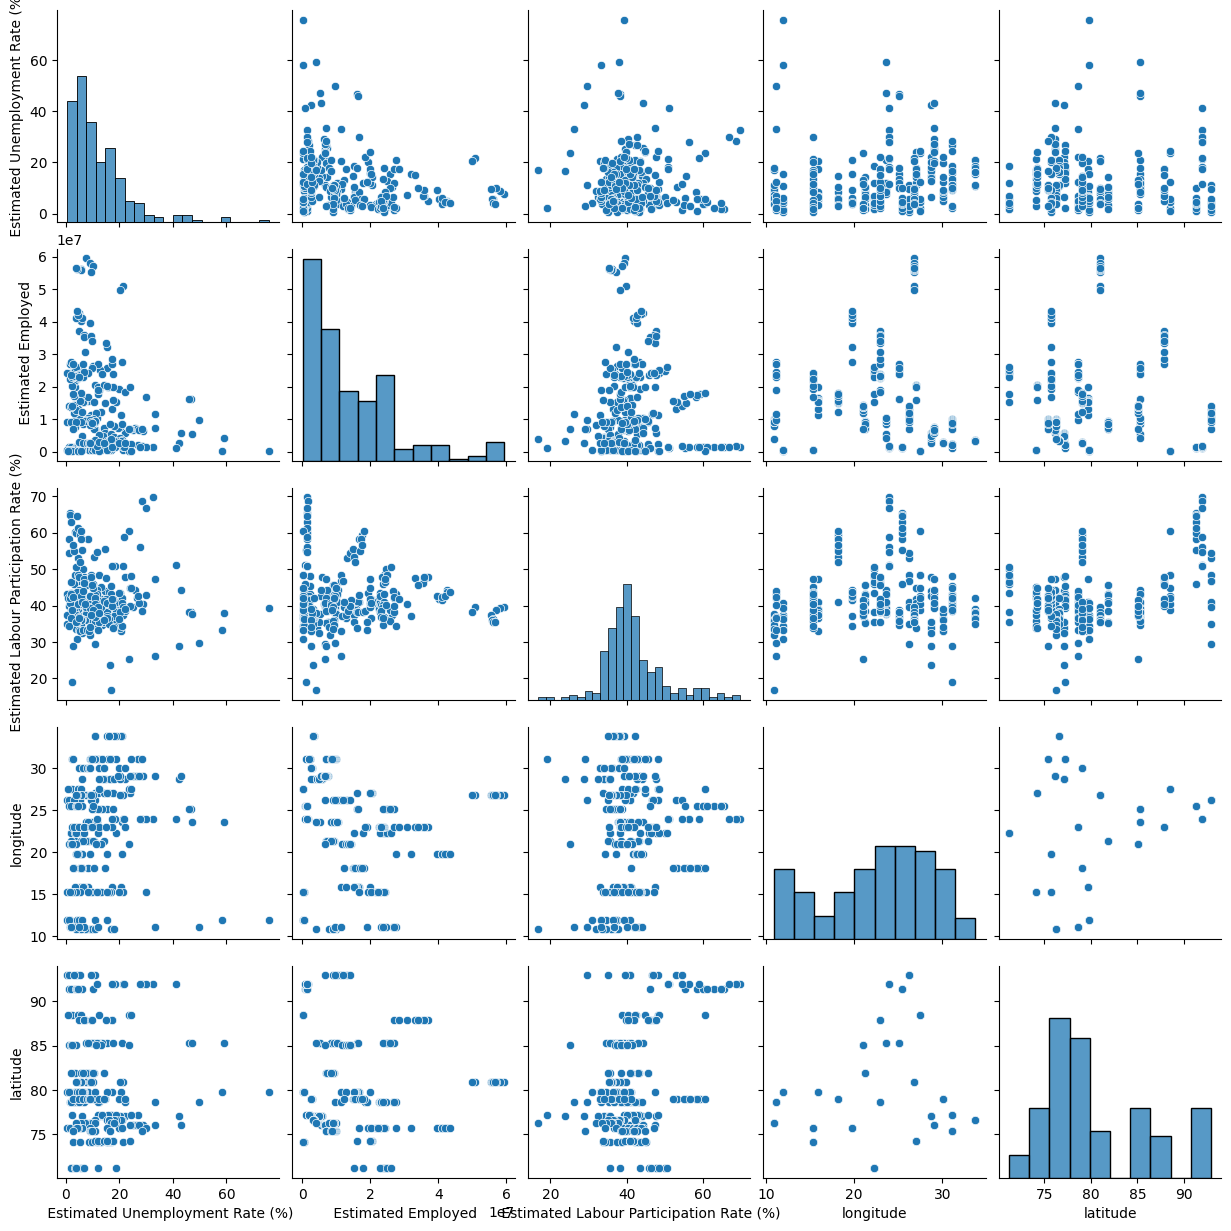

In [ ]:


# Pairplot for visualizing relationships between numerical variables
sns.pairplot(unemployment_data)
plt.show()



<ipython-input-15-2146809c520d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = unemployment_data.corr()


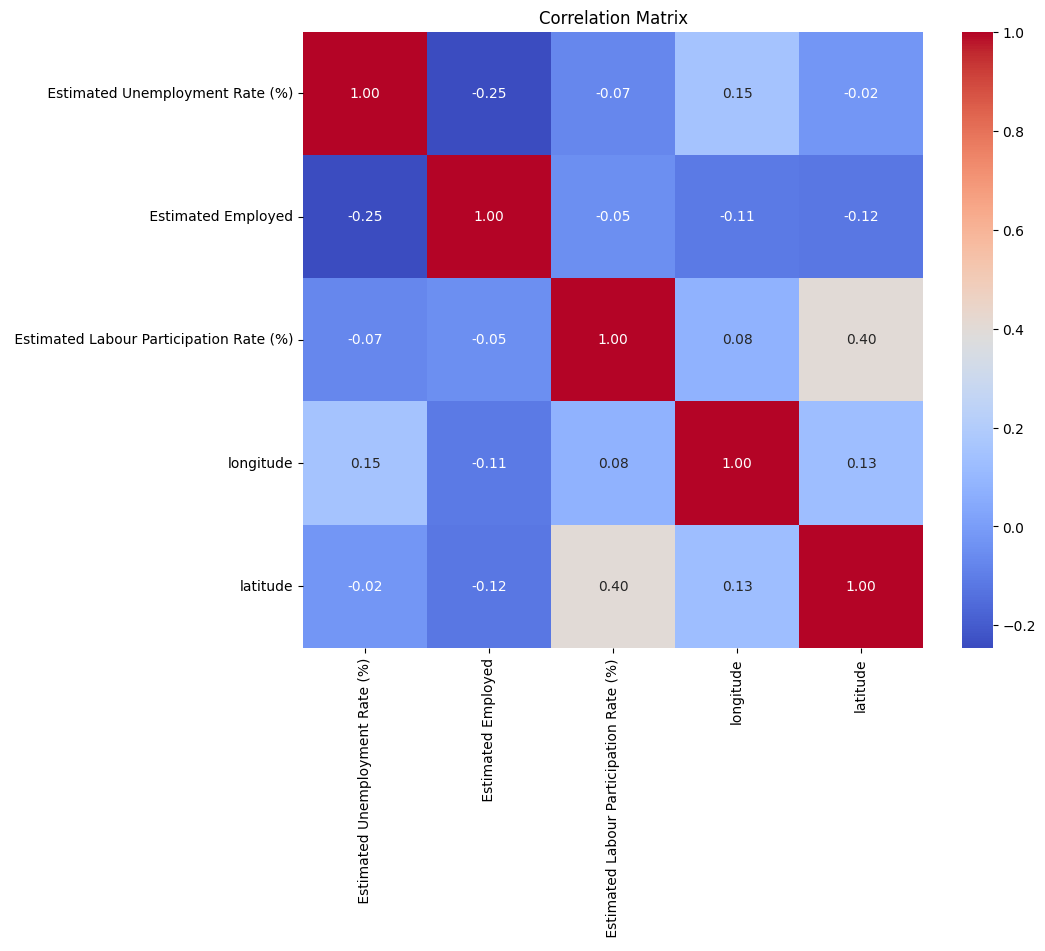

In [ ]:
# Correlation matrix heatmap
correlation_matrix = unemployment_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()




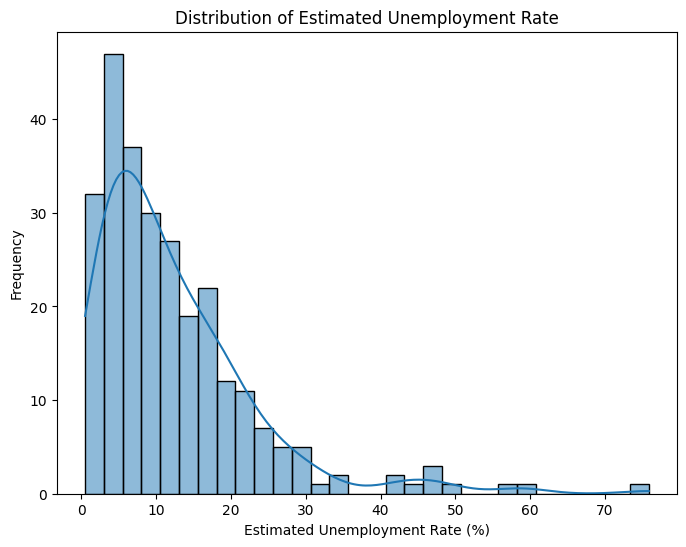

In [ ]:
# Histogram for Unemployment Rate
plt.figure(figsize=(8, 6))
sns.histplot(unemployment_data[' Estimated Unemployment Rate (%)'], bins=30, kde=True)
plt.title("Distribution of Estimated Unemployment Rate")
plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Step 6: Feature Engineering

In [ ]:


# Create a new feature: Unemployed to Employed Ratio
unemployment_data['Unemployed to Employed Ratio'] = unemployment_data[' Estimated Unemployment Rate (%)'] / unemployment_data[' Estimated Employed']

# Display the updated DataFrame
print(unemployment_data.head())


           Region         date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  Unemployed to Employed Ratio  
0    15

# Step 7: Time Series Analysis

In [ ]:


# Convert the 'date' column to datetime format
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])



In [ ]:
# Set the 'date' column as the index
unemployment_data.set_index('date', inplace=True)




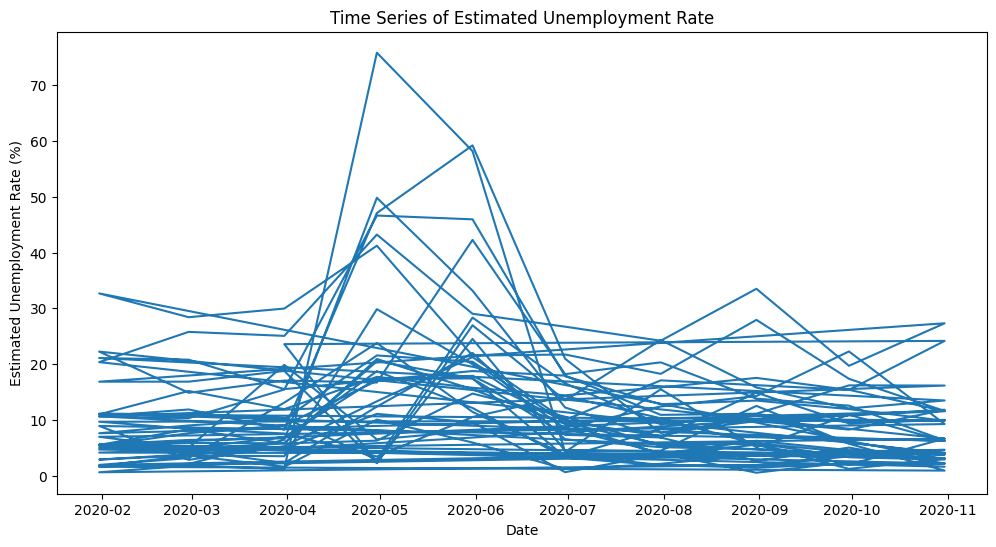

In [ ]:
# Plot the time series of Estimated Unemployment Rate
plt.figure(figsize=(12, 6))
plt.plot(unemployment_data[' Estimated Unemployment Rate (%)'])
plt.title("Time Series of Estimated Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()

# Step 8: Regression Analysis

In [ ]:

import statsmodels.api as sm



In [ ]:
# Assume 'X' is the independent variable and 'y' is the dependent variable
# For this example, let's use 'Estimated Employed' as the independent variable and 'Estimated Unemployment Rate (%)' as the dependent variable

X = unemployment_data[' Estimated Employed']
y = unemployment_data[' Estimated Unemployment Rate (%)']



In [ ]:
# Add a constant term to the independent variable
X = sm.add_constant(X)



In [ ]:
# Fit the regression model
model = sm.OLS(y, X).fit()



In [ ]:
# Display the regression results
print(model.summary())


                                   OLS Regression Results                                   
Dep. Variable:      Estimated Unemployment Rate (%)   R-squared:                       0.060
Model:                                          OLS   Adj. R-squared:                  0.057
Method:                               Least Squares   F-statistic:                     16.95
Date:                              Sun, 31 Dec 2023   Prob (F-statistic):           5.14e-05
Time:                                      14:30:40   Log-Likelihood:                -1005.5
No. Observations:                               267   AIC:                             2015.
Df Residuals:                                   265   BIC:                             2022.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                          coef    std err          t      P>|t|      [

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



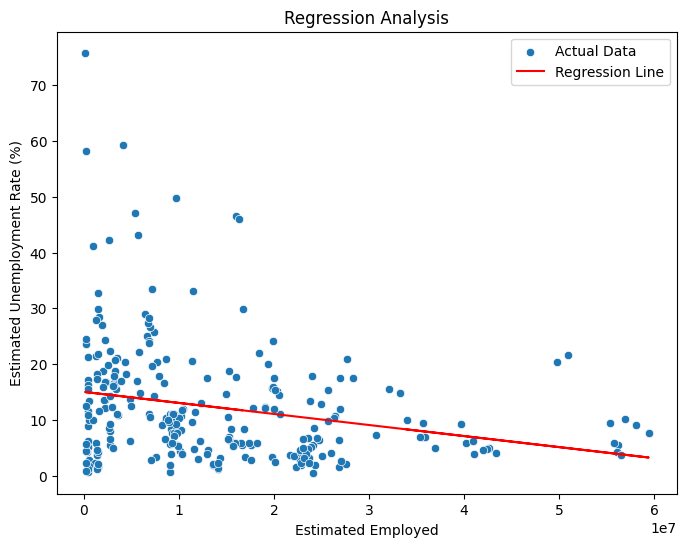

In [ ]:
# Scatter plot of the data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' Estimated Employed', y=' Estimated Unemployment Rate (%)', data=unemployment_data, label='Actual Data')

# Plotting the regression line
plt.plot(unemployment_data[' Estimated Employed'], model.predict(X), color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Regression Analysis')
plt.legend()

# Show the plot
plt.show()
